In [35]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from pandas import read_csv

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [36]:
# Set up a 'look back' dataset for sequence to label prediction with Keras.

# The LSTM network expects the input data (X) to be provided with a specific
# array structure in the form of: [samples, time steps, features].

# create_dataset is adapted from
# http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

def create_dataset(X, Y, **options):
    """Convert an array of X, Y values into a dataset matrix for and LSTM"""
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

# Predictions will be based on look_back minutes of data:
look_back = 50

In [ ]:
Test1 = glob.glob('../Users/XiaonfengWang/Desktop/TrafficNet/Required/Test_Flow/*.csv')

X_Test1 = np.empty((1, 50, 35))
Y_Test1 = np.empty((1,))

for f in range(300):
    print(Test1[f].split('/')[-1])
    
    Flow_Test1 = pd.read_csv(Test1[f], usecols=['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead','Flow'])
    Flow_Test1.fillna(10000000, inplace=True)
    
    Y_train_Test1 = np.array(Flow_Test1['Flow'].values)
    X_train_Test1 = np.array(Flow_Test1[['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead']])
    
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train_Test1.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train_Test1 = scaler.fit_transform(X_train_Test1)
    #print(len(X_train))
    #print(X_train_Test1.shape, Y_train_Test1.shape)
    
    XTest1, YTest1 = create_dataset(X_train_Test1, Y_train_Test1, look_back=look_back)
    #print(XTest1.shape, YTest1.shape)
    
    X_Test1 = np.append(X_Test1, XTest1, axis=0)
    Y_Test1 = np.append(Y_Test1, YTest1, axis=0)

In [73]:
path = glob.glob('../Users/XiaonfengWang/Desktop/TrafficNet/Required/Train_Flow/*.csv')

X_all = np.empty((1, 50, 35))
Y_all = np.empty((1,))

for j in range(50):
    #print(j)
    
    Flow = pd.read_csv(path[j], usecols=['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead','Flow'])
    Flow.fillna(10000000, inplace=True)
    
    Y_train = np.array(Flow['Flow'].values)
    X_train = np.array(Flow[['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    #print(X_train.shape, Y_train.shape)
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    #print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

# more 500

In [64]:
X_all5 = np.empty((1, 50, 35))
Y_all5 = np.empty((1,))

for j in range(450,500):
    #print(j)
    
    Flow5 = pd.read_csv(path[j], usecols=['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead','Flow'])
    if Flow5.shape[0] <= 50:
        pass
    else:
        Flow5.fillna(10000000, inplace=True)
    
        Y_train5 = np.array(Flow5['Flow'].values)
        X_train5 = np.array(Flow5[['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead']])

    # Scale/whiten the X data
        scaler = StandardScaler()
        X_train5 = scaler.fit_transform(X_train5)
    #print(len(X_train))
    #print(X_train5.shape, Y_train5.shape)
    
        X5, Y5 = create_dataset(X_train5, Y_train5, look_back=look_back)
        #print(X5.shape, Y5.shape)
    
        X_all5 = np.append(X_all5, X5, axis=0)
        Y_all5 = np.append(Y_all5, Y5, axis=0)


In [65]:
print(len(X_all5)//64*64+1)

2113


In [66]:
X_all5 = X_all5[1:2113]
Y_all5 = Y_all5[1:2113]

Xtrain = np.append(Xtrain, X_all5, axis=0)
Ytrain = np.append(Ytrain, Y_all5, axis=0)

#collections.Counter(Ytrain)

In [74]:
print(len(X_all)//64*64 + 1, len(X_Test1)//64*64 + 1)

4545 28929


In [75]:
XAlltest1 = X_Test1[1:28929]
YAlltest1 = Y_Test1[1:28929]

Xtrain = X_all[1:4545]
Ytrain = Y_all[1:4545]

collections.Counter(Ytrain)

In [7]:
# Create the LSTM network.
batch_size = 32
dropout = 0.5
num_epoch = 100
earlyStopping = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')
weights = {0:1, 1:1}

In [76]:
model_Flow1 = Sequential()
model_Flow1.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow1.add(Dropout(dropout))
model_Flow1.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

history91 = model_Flow1.fit(
    Xtrain, Ytrain,
    class_weight=weights,
    validation_data=(XAlltest1, YAlltest1),
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

print(history91.history)

Y_predict4 = model_Flow1.predict_classes(XAlltest1, verbose=True)

a6 = Y_predict4.tolist()
a26 = [item[0] for item in a6]
b6 = YAlltest1.tolist()
#equal_arrays6 = [i for i, (x, y) in enumerate(zip(a26, b6)) if x == y]
#acc6 = len(equal_arrays6)/len(a26)
#print(acc6)

#f = open("CutIn9_clean_TestAll_volvo.csv", "w")

#for index in range(len(a26)):
#    f.write(str(a26[index]) + "," + str(b6[index]) + "\n")
#f.close()

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 3..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 4544 samples, validate on 28928 samples
Epoch 1/100
4544/4544 [==============================] - 30s 7ms/step - loss: 0.5319 - accuracy: 0.9054 - val_loss: 0.3745 - val_accuracy: 0.9608
Epoch 2/100
4544/4544 [==============================] - 26s 6ms/step - loss: 0.3159 - accuracy: 0.9452 - val_loss: 0.2280 - val_accuracy: 0.9599
Epoch 3/100
4544/4544 [==============================] - 24s 5ms/step - loss: 0.2228 - accuracy: 0.9615 - val_loss: 0.1555 - val_accuracy: 0.9668
Epoch 4/100
4544/4544 [==============================] - 23s 5ms/step - loss: 0.1763 - accuracy: 0.9663 - val_loss: 0.1393 - val_accuracy: 0.9554
Epoch 5/100
4544/4544 [==============================] - 22s 5ms/step - loss: 0.1384 - accuracy: 0.9729 - val_loss: 0.1230 - val_accuracy: 0.9526
Epoch 6/100
4544/4544 [==============================] - 23s 5ms/step - loss: 0.1214 - accuracy: 0.9767 - val_loss: 0.1105 - val_accuracy: 0.9559
Epoch 7/100
4544/4544 [==============================] - 23s 5ms/step - los

In [ ]:
nums_predict = [index for index, element in enumerate(a26) if element == 1]
p = sum((list(t) for t in zip(nums_predict, nums_predict[1:]) if t[0]+1 != t[1]), [])
p.insert(0,nums_predict[0])
p.append(nums_predict[-1])

nums_Y = [index for index, element in enumerate(b6) if element == 1]
y = sum((list(t) for t in zip(nums_Y, nums_Y[1:]) if t[0]+1 != t[1]), [])
y.insert(0,nums_Y[0])
y.append(nums_Y[-1])

big=0
small=0
same=0

for i in range(len(y)-1):
    if i % 2 == 0:
        for j in range(len(p)):
            if j % 2 == 0: 

                if (y[i] == p[j]) and (y[i+1] == p[j+1]):
                    same=same+1
                    j=j+2
                
                elif p[j]<=y[i] and p[j+1]>=y[i+1]:
                    big=big+1
                    j=j+2
                        
                elif p[j]>=y[i] and p[j+1]<=y[i+1]:
                    small=small+1
                    j=j+2
                    
                else:
                    j=j+2       
        i=i+2    

Predict = len(p)/2
Y = len(y)/2
#fp = Predict-same
#fn = Y-same
#prec = same/(same+fp)
#recall = same/(same+fn)

def precision(n):
    fp = Predict-n
    prec = n/(n+fp)
    if prec >=1:
        b=1
    else:
        b=prec
    return b

def recall(n):
    fn = Y-n
    rec = n/(n+fn)
    if rec >=1:
        a=1
    else:
        a=rec
    return a
    
def conf(f):
    conf95 = []
    for i in range(len(y)):
        if i%2 == 0:
            c951=int(y[i]-f*(y[i+1]-y[i]))
            conf95.append(c951)
            conf95.append(y[i+1])
        
            c9522=y[i]+f*(y[i+1]-y[i])
            if float(c9522).is_integer()==True:
                conf95.append(c9522)
                conf95.append(y[i+1])
            else:
                con952 = int(c9522)+1
                conf95.append(con952)
                conf95.append(y[i+1])
        
            conf95.append(y[i])
            c9533=int(y[i+1]-f*(y[i+1]-y[i]))
            if float(c9533).is_integer()==True:
                conf95.append(c9533)
            else:
                c953 = int(c9533)+1
                conf95.append(c953)
            
            conf95.append(y[i])    
            c9544=y[i+1]+f*(y[i+1]-y[i])
            if float(c9544).is_integer()==True:
                conf95.append(c9544)
            else:
                con954 = int(c9544)+1
                conf95.append(con954)
        i=i+2
    return conf95

def result(rangelist):
    con95=0
    for i in range(len(p)):
        if i%2 == 0:
            for j in range(len(rangelist)-7):
                if j%8==0:
                    if (rangelist[j]<=p[i] and p[i+1]<=rangelist[j+1]) or (rangelist[j+2]<=p[i] and p[i+1]<=rangelist[j+3]) or (rangelist[j+4]<=p[i] and p[i+1]<=rangelist[j+5]) or (rangelist[j+6]<=p[i] and p[i+1]<=rangelist[j+7]):       
                        con95=con95+1
                        #break
                        j=j+8
                    else:
                        j=j+8
            i=i+2
    return con95   

con95 = result(conf(0.05))
con90 = result(conf(0.1))          
con85 = result(conf(0.15))            
con80 = result(conf(0.2))

In [78]:
print("Predict:", Predict, "-", "True:", Y)   
print("big:",big, "-", "precision:", precision(big), "-", "recall:", recall(big))  
print("small:",small, "-", "precision:", precision(small), "-", "recall:", recall(small)) 
print("-")
print("same:",same, "-", "precision:", precision(same), "-", "recall:", recall(same)) 
print("con95:",con95, "-", "precision:", precision(con95), "-", "recall:", recall(con95))  
print("con90:",con90, "-", "precision:", precision(con90), "-", "recall:", recall(con90)) 
print("con85:",con85, "-", "precision:", precision(con85), "-", "recall:", recall(con85)) 
print("con80:",con80, "-", "precision:", precision(con80), "-", "recall:", recall(con80))

Predict: 498.0 - True: 529.0
big: 143 - precision: 0.28714859437751006 - recall: 0.27032136105860116
small: 58 - precision: 0.11646586345381527 - recall: 0.10964083175803403
-
same: 305 - precision: 0.6124497991967871 - recall: 0.5765595463137996
con95: 458 - precision: 0.9196787148594378 - recall: 0.8657844990548205
con90: 463 - precision: 0.929718875502008 - recall: 0.8752362948960303
con85: 465 - precision: 0.9337349397590361 - recall: 0.8790170132325141
con80: 468 - precision: 0.9397590361445783 - recall: 0.8846880907372401


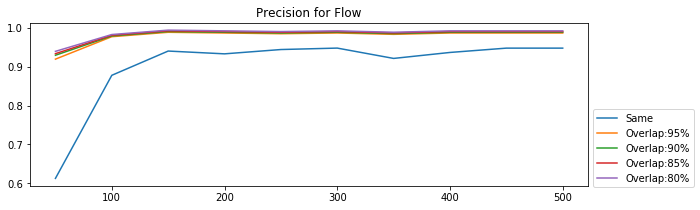

In [80]:
same_P = [0.6124497991967871,0.8780487804878049 ,0.9405204460966543 ,0.9333333333333333 ,0.9444444444444444 , 0.9481481481481482,0.9215328467153284 , 0.9369202226345084, 0.948051948051948, 0.948051948051948]
con95_P = [ 0.9196787148594378,0.9774859287054409,0.9888475836431226 ,0.987037037037037 , 0.9851851851851852,0.987037037037037 ,0.9835766423357665 ,0.987012987012987, 0.987012987012987, 0.987012987012987]
con90_P = [0.929718875502008, 0.9793621013133208, 0.9907063197026023,0.9888888888888889 , 0.987037037037037,0.9888888888888889,0.9854014598540146 , 0.9888682745825603,0.9888682745825603,0.9888682745825603 ]
con85_P = [ 0.9337349397590361,0.9812382739212008,0.9925650557620818 ,0.9907407407407407 ,0.9888888888888889 ,0.9907407407407407, 0.9872262773722628, 0.9907235621521335,0.9907235621521335,0.9907235621521335]
con80_P = [0.9397590361445783, 0.9831144465290806,0.9944237918215614 ,0.9925925925925926 , 0.9907407407407407, 0.9925925925925926, 0.9890510948905109,0.9925788497217068,0.9925788497217068,0.9925788497217068]


x = [50,100,150,200,250,300,350,400,450,500]

f, ax = plt.subplots(figsize=(10,3))
plt.plot(x, same_P)
plt.plot(x, con95_P)
plt.plot(x, con90_P)
plt.plot(x, con85_P)
plt.plot(x, con80_P)

plt.legend(['Same', 'Overlap:95%', 'Overlap:90%', 'Overlap:85%', 'Overlap:80%'], loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title('Precision for Flow')
plt.show()


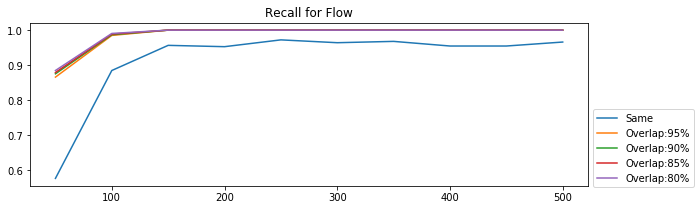

In [84]:
same_R = [0.5765595463137996,0.8846880907372401 , 0.9565217391304348, 0.9527410207939508, 0.972181551976574, 0.9640831758034026, 0.9678638941398866,0.9546313799621928 , 0.9546313799621928, 0.9659735349716446]
con95_R = [0.8657844990548205,0.9848771266540642,1, 1, 1, 1,1,1, 1,1 ]
con90_R = [0.8752362948960303,0.9867674858223062,1, 1, 1, 1, 1,1, 1,1]
con85_R = [0.8790170132325141,0.9886578449905482,1, 1, 1, 1,1,1, 1,1]
con80_R = [0.8846880907372401,0.9905482041587902,1, 1, 1, 1, 1, 1,1,1]


f, ax = plt.subplots(figsize=(10,3))
plt.plot(x, same_R)
plt.plot(x, con95_R)
plt.plot(x, con90_R)
plt.plot(x, con85_R)
plt.plot(x, con80_R)

plt.legend(['Same', 'Overlap:95%', 'Overlap:90%', 'Overlap:85%', 'Overlap:80%'], loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title('Recall for Flow')
plt.show()

In [85]:
#model_Flow1.save("TrafficNetToVolvo_FlowMaskingSparse-1.h5")
model_Flow1.save("Flow_volvo_precision_recall.h5")
print("Saved model to disk")

Saved model to disk


In [100]:
volvo = pd.read_csv('../TrafficNet/VolvoData/2018w33_San_Francisco-0011.csv', usecols=['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead','Flow'])
volvo.head()

,Lane,Velocity,PosLgt1,PosLgt2,PosLgt3,PosLat1,PosLat2,VelLgt1,VelLgt2,VelLgt3,...,Id2,Id3,Lane1,Lane2,Lane3,PositionInLane1,PositionInLane2,PositionInLane3,Lead,Flow
0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [101]:
volvo.fillna(10000000, inplace=True)

Yvolvo = np.array(volvo['Flow'].values)
Xvolvo = np.array(volvo[['Lane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLat1','PosLat2','VelLgt1','VelLgt2','VelLgt3','VelLat1','VelLat2','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Type3','Id1','Id2','Id3','Lane1','Lane2','Lane3','PositionInLane1','PositionInLane2','PositionInLane3','Lead']])

    
# Scale/whiten the X data
scaler = StandardScaler()
X_volvo = scaler.fit_transform(Xvolvo)
XP_volvo, YP_volvo = create_dataset(X_volvo, Yvolvo, look_back=look_back)

(len(XP_volvo)//64)*64

63744

In [102]:
XPP_volvo = XP_volvo[:63744]
YPP_volvo = YP_volvo[:63744]

In [103]:
Y_predict_volvo = model_Flow1.predict_classes(XPP_volvo, verbose=True)

#equal_arrays_volvo = (Y_predict_volvo == YPP_volvo).all(axis=1)
#acc_volvo = np.count_nonzero(equal_arrays_volvo == True)/len(equal_arrays_volvo)

a6 = Y_predict_volvo.tolist()
a26 = [item[0] for item in a6]
b6 = YPP_volvo.tolist()

63744/63744 [==============================] - 43s 671us/step


In [105]:
# 2018w33_San_Francisco
print("Predict:", Predict, "-", "True:", Y)   
print("big:",big, "-", "precision:", precision(big), "-", "recall:", recall(big))  
print("small:",small, "-", "precision:", precision(small), "-", "recall:", recall(small)) 
print("-")
print("same:",same, "-", "precision:", precision(same), "-", "recall:", recall(same)) 
print("con95:",con95, "-", "precision:", precision(con95), "-", "recall:", recall(con95))  
print("con90:",con90, "-", "precision:", precision(con90), "-", "recall:", recall(con90)) 
print("con85:",con85, "-", "precision:", precision(con85), "-", "recall:", recall(con85)) 
print("con80:",con80, "-", "precision:", precision(con80), "-", "recall:", recall(con80))

Predict: 131.0 - True: 113.0
big: 2 - precision: 0.015267175572519083 - recall: 0.017699115044247787
small: 0 - precision: 0.0 - recall: 0.0
-
same: 111 - precision: 0.8473282442748091 - recall: 0.9823008849557522
con95: 114 - precision: 0.8702290076335878 - recall: 1
con90: 117 - precision: 0.8931297709923665 - recall: 1
con85: 121 - precision: 0.9236641221374046 - recall: 1
con80: 126 - precision: 0.9618320610687023 - recall: 1


In [99]:
# Test_2019w26_CPUload_Kiel_Amsterdam-0011
print("Predict:", Predict, "-", "True:", Y)   
print("big:",big, "-", "precision:", precision(big), "-", "recall:", recall(big))  
print("small:",small, "-", "precision:", precision(small), "-", "recall:", recall(small)) 
print("-")
print("same:",same, "-", "precision:", precision(same), "-", "recall:", recall(same)) 
print("con95:",con95, "-", "precision:", precision(con95), "-", "recall:", recall(con95))  
print("con90:",con90, "-", "precision:", precision(con90), "-", "recall:", recall(con90)) 
print("con85:",con85, "-", "precision:", precision(con85), "-", "recall:", recall(con85)) 
print("con80:",con80, "-", "precision:", precision(con80), "-", "recall:", recall(con80))

Predict: 513.0 - True: 129.0
big: 33 - precision: 0.06432748538011696 - recall: 0.2558139534883721
small: 0 - precision: 0.0 - recall: 0.0
-
same: 96 - precision: 0.1871345029239766 - recall: 0.7441860465116279
con95: 130 - precision: 0.253411306042885 - recall: 1
con90: 137 - precision: 0.26705653021442494 - recall: 1
con85: 143 - precision: 0.2787524366471735 - recall: 1
con80: 148 - precision: 0.2884990253411306 - recall: 1
